### 1.问题描述
##### 本次作业中自行选择2个数据集进行探索性分析与预处理
### 2.所选数据集
##### （1）Alzheimer Disease and healthy aging data in US
##### （2）Movies Dataset from Pirated Sites

### 3.对数据集2: Movies Dataset from Pirated Sites的数据分析
##### 3.1 数据摘要


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime

In [3]:
# load data
path = "/data/yanmuge/yanmuge/hyperRecon/freq_dau/datamining/datasets/archive/movies_dataset.csv"
df = pd.read_csv(path)

# data attributes
df.head(5)

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,3,8.1,NaN,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,878",Venky Atluri
4,4,4.6,NaN,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,"2,438",Rajesh Jayaraman


In [4]:
df.columns

Index(['Unnamed: 0', 'IMDb-rating', 'appropriate_for', 'director', 'downloads',
       'id', 'industry', 'language', 'posted_date', 'release_date', 'run_time',
       'storyline', 'title', 'views', 'writer'],
      dtype='object')

In [22]:
df.dtypes

Unnamed: 0           int64
IMDb-rating        float64
appropriate_for     object
director            object
downloads          float64
id                   int64
industry            object
language            object
posted_date         object
release_date        object
run_time            object
storyline           object
title               object
views              float64
writer              object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20548 entries, 0 to 20547
Data columns (total 15 columns):
Unnamed: 0         20548 non-null int64
IMDb-rating        19707 non-null float64
appropriate_for    11072 non-null object
director           18610 non-null object
downloads          20547 non-null object
id                 20548 non-null int64
industry           20547 non-null object
language           20006 non-null object
posted_date        20547 non-null object
release_date       20547 non-null object
run_time           18780 non-null object
storyline          18847 non-null object
title              20547 non-null object
views              20547 non-null object
writer             18356 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 2.4+ MB


##### 3.1.1 标称属性：给出每个可能取值的频数
##### 3.1.2 数值属性：给出五数概括及缺失值的个数


通过上述操作我们发现，有6个数值属性，其余可看作标称属性共计23个，下面对每个属性进行频数估计(标称属性)和五数概括（数值属性）。

In [6]:
object_columns = df.select_dtypes(include='object').columns

# 计算标称属性的频数
frequecy_list = [df[index].value_counts() for index in object_columns]
[print(frequecy) for frequecy in frequecy_list]

R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
Drama, Romance       1
Drama                1
MA-17                1
TV-13                1
18+                  1
Name: appropriate_for, dtype: int64
Venky Atluri                           405
Xavier Manrique                        403
Simone Stock                           403
Neil Jordan                            205
John Swab                              205
Rohit Dhawan                           203
Lindsay Hartley                        203
Nadira Amrani                          202
Elegance Bratton                       202
Bess Wohl                              201
Aline Brosh McKenna                    201
Sean Lah

[None, None, None, None, None, None, None, None, None, None, None, None]

In [7]:
# 数值属性的五数概括
df.describe().loc[['min', '25%', '50%', '75%', 'max'], :]

,Unnamed: 0,IMDb-rating,id
min,0.00,1.1,1.00
25%,5136.75,4.8,96122.25
50%,10273.50,5.7,264457.50
75%,15410.25,6.6,354561.25
max,20547.00,9.9,372092.00


##### 统计所有属性的缺失值个数

In [8]:
missing_values_count = df.isna().sum()
missing_values_count

Unnamed: 0            0
IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
id                    0
industry              1
language            542
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64

可以看到除了“id”属性和“unnamed”属性外，其他属性均有缺失。且通过经验可知，“downloads”、“id”和“views”三个属性应当为数值属性，所以在这里首先进行数据的转换。

In [9]:
# 提取标称属性
df["downloads"] = df["downloads"].apply(pd.to_numeric, errors='coerce')
df["id"] = df["id"].apply(pd.to_numeric, errors='coerce')
df["views"] = df["views"].apply(pd.to_numeric, errors='coerce')
nominal_col = [i for i in df.dtypes._stat_axis.values.tolist() if df.dtypes[i]=='object']
print(nominal_col)
value_col = [i for i in df.dtypes._stat_axis.values.tolist() if i not in nominal_col]
print(value_col)

['appropriate_for', 'director', 'industry', 'language', 'posted_date', 'release_date', 'run_time', 'storyline', 'title', 'writer']
['Unnamed: 0', 'IMDb-rating', 'downloads', 'id', 'views']


计算所有标称属性的频数如下：

In [23]:
for i, column in enumerate(nominal_col):
    y = df[column].value_counts()
    print(y)

R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
Drama, Romance       1
Drama                1
MA-17                1
TV-13                1
18+                  1
Name: appropriate_for, dtype: int64
Venky Atluri                           405
Xavier Manrique                        403
Simone Stock                           403
Neil Jordan                            205
John Swab                              205
Rohit Dhawan                           203
Lindsay Hartley                        203
Nadira Amrani                          202
Elegance Bratton                       202
Bess Wohl                              201
Aline Brosh McKenna                    201
Sean Lah

下面绘制直方图和盒图并检查数据的分布和数据中的离群点。

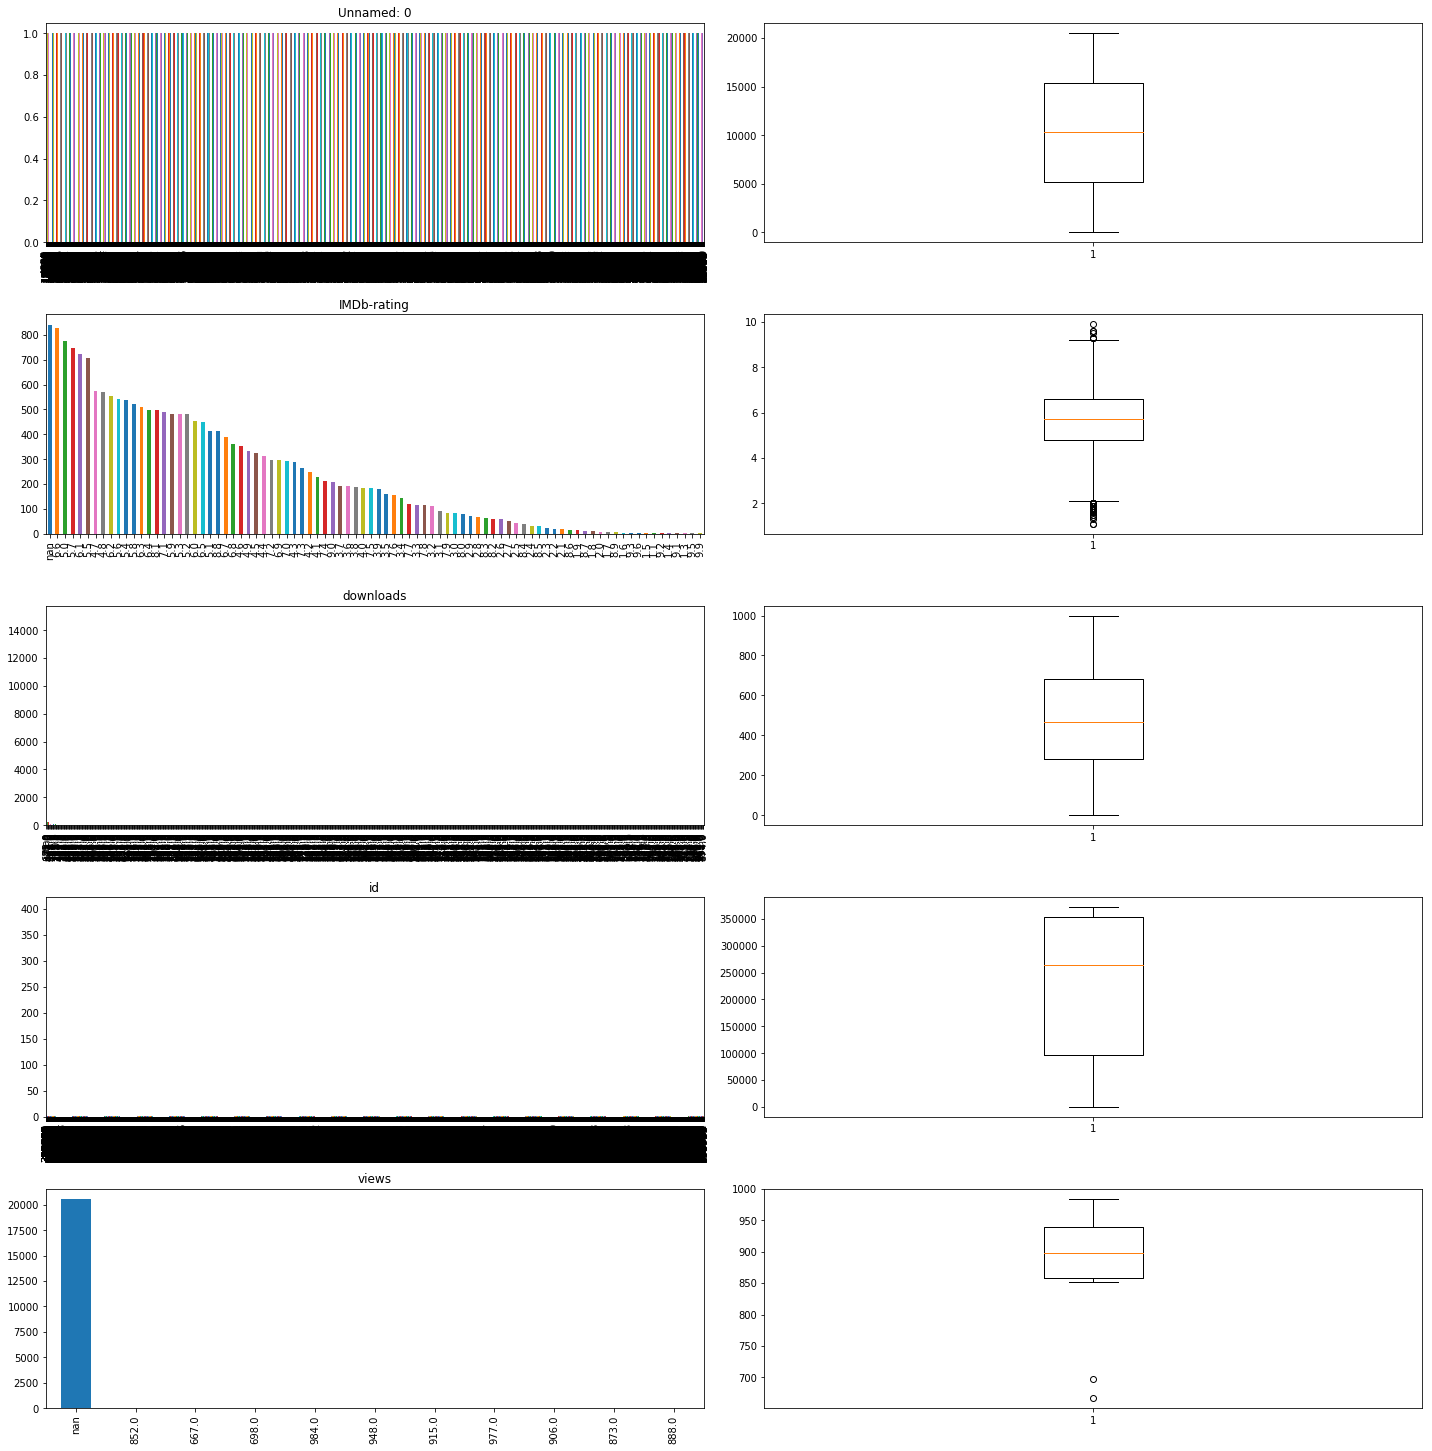

In [24]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(value_col):
    plt.subplot(5, 2, 2*(i+1)-1)
    x = df[col].value_counts().sort_index(axis=0)._stat_axis.values
    y = np.array(df[col].value_counts().sort_index(axis=0))
    plt.title(col)
    plt.tight_layout()
    df[col].value_counts(dropna=False).plot(kind="bar",title=col)
    plt.subplot(5, 2, 2*(i+1))
    plt.boxplot(df[col][~np.isnan(df[col])])
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.2)
plt.show()

从上面的盒图可以看到属性"IMDB-rating"和属性"views"均有离群点，其他三个属性的内容则没有离群点。

##### 3.2 处理缺失数据
首先获得哪些属性存在缺失值。

In [25]:
print(df.isnull().sum(axis=0))

Unnamed: 0             0
IMDb-rating          841
appropriate_for     9476
director            1938
downloads          15003
id                     0
industry               1
language             542
posted_date            1
release_date           1
run_time            1768
storyline           1701
title                  1
views              20538
writer              2192
dtype: int64


接着统计所有具有缺失值的属性的列表。

In [12]:
na_columns = df.loc[:, (df.isnull().any())].columns
na_columns

Index(['IMDb-rating', 'appropriate_for', 'director', 'downloads', 'industry',
       'language', 'posted_date', 'release_date', 'run_time', 'storyline',
       'title', 'views', 'writer'],
      dtype='object')

下面按照四种策略对缺失值进行处理，分别是：
1.将缺失部分剔除
2.用最高频数值进行填充
3.利用属性相关性进行填充
4.根据数据对象相似性填补缺失值

1.将缺失部分剔除，在这里将DataFrame中含有缺失值的行或列删除。

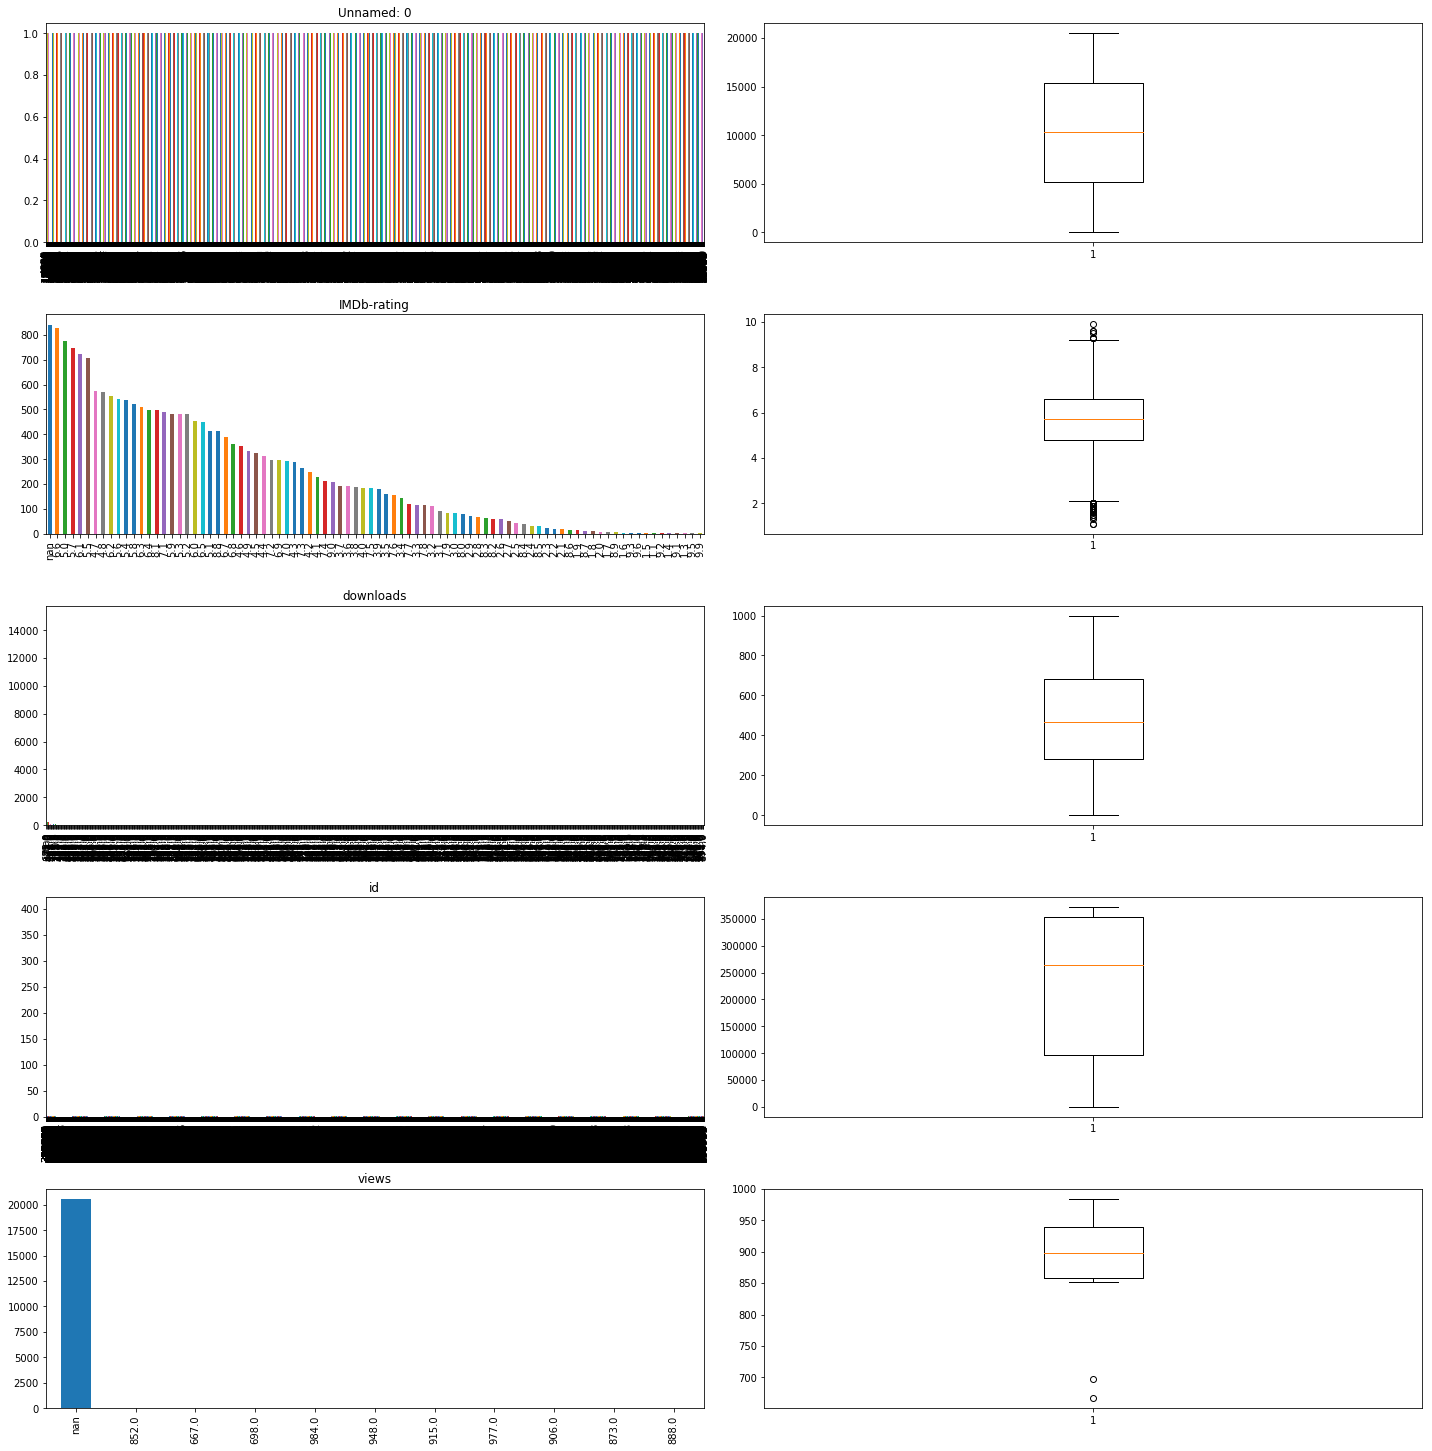

In [26]:
process_col = ["IMDb-rating", "downloads", "views"]
# 将缺失部分剔除
df.dropna(axis=0,subset = process_col)
plt.figure(figsize=(20, 20))
for i, col in enumerate(value_col):
    plt.subplot(5, 2, 2*(i+1)-1)
    x = df[col].value_counts().sort_index(axis=0)._stat_axis.values
    y = np.array(df[col].value_counts().sort_index(axis=0))
    plt.title(col)
    plt.tight_layout()
    df[col].value_counts(dropna=False).plot(kind="bar",title=col)
    plt.subplot(5, 2, 2*(i+1))
    plt.boxplot(df[col][~np.isnan(df[col])])

plt.show()

2.用最高频率值填补缺失值

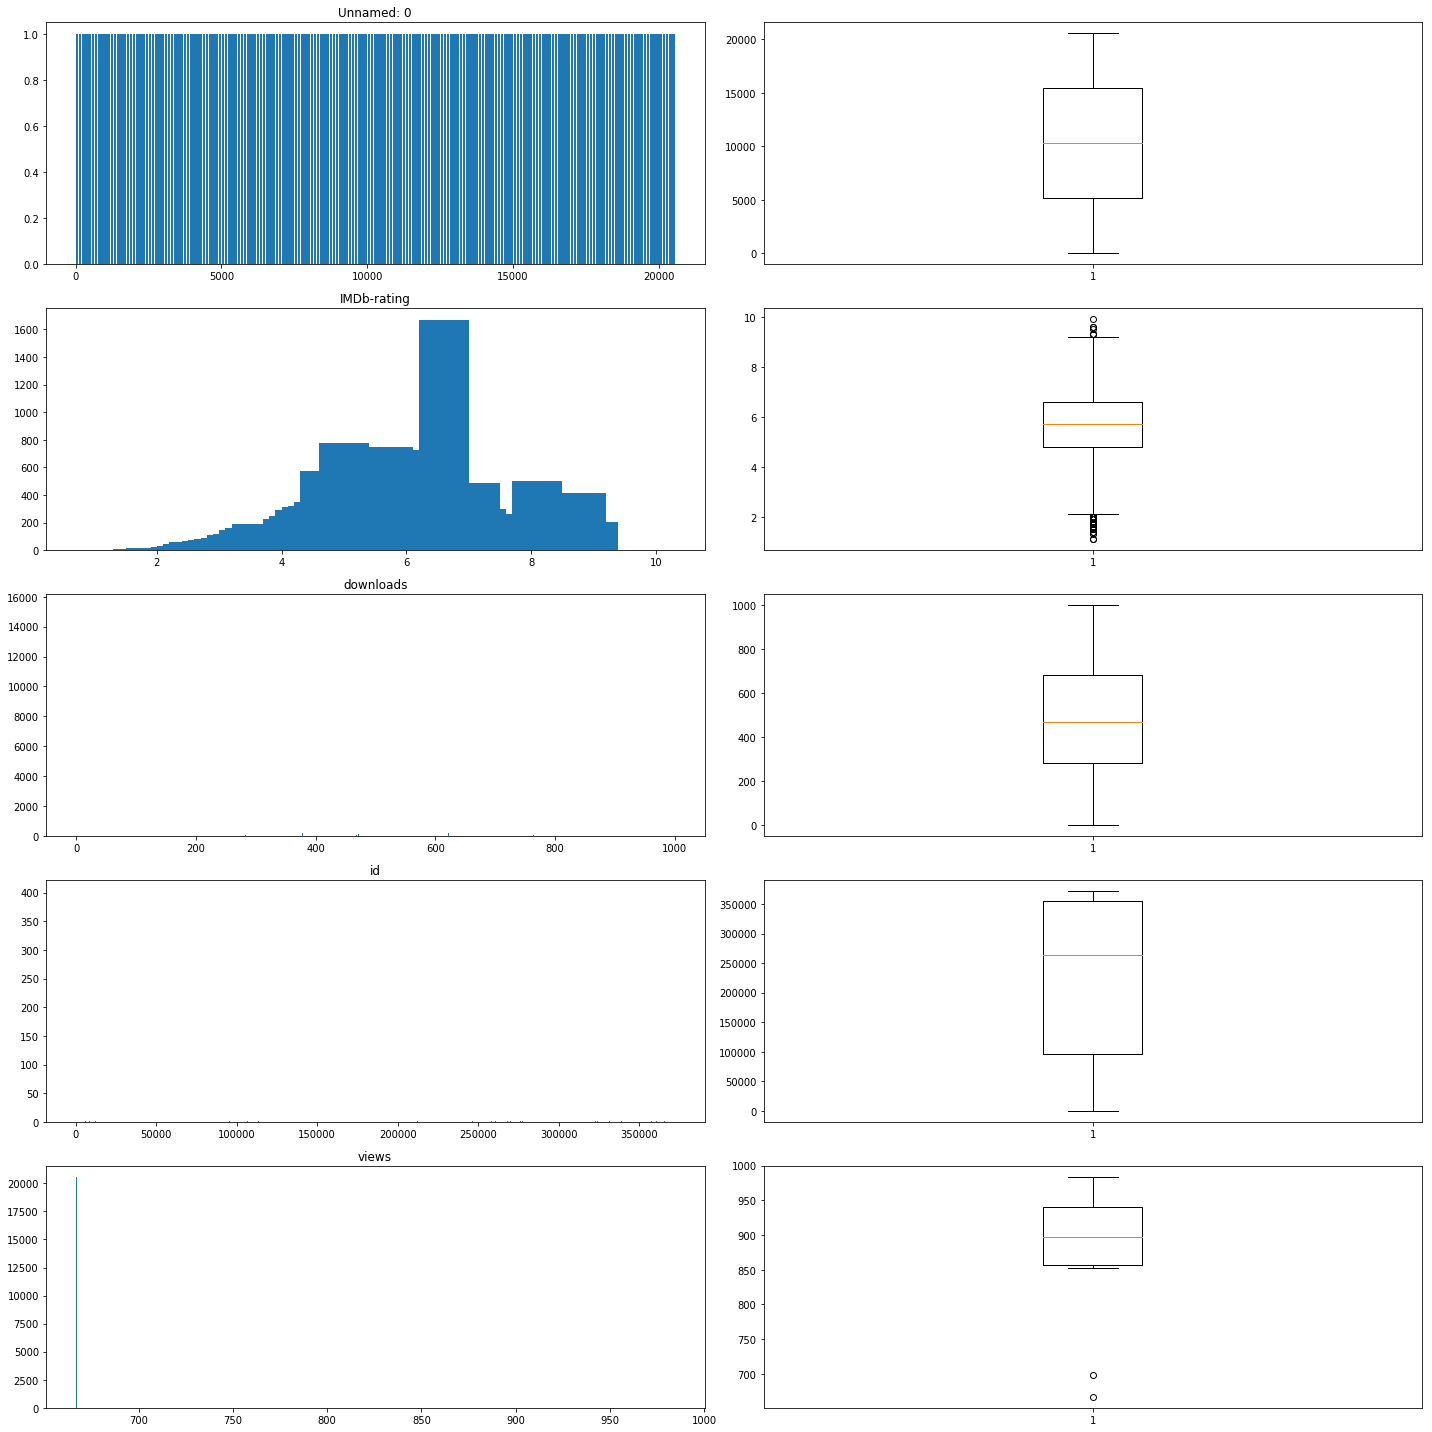

In [15]:
import warnings
warnings.filterwarnings("ignore")

df2 = df.copy()
df2["downloads"] = df2["downloads"].apply(pd.to_numeric, errors='coerce')
df2["id"] = df2["id"].apply(pd.to_numeric, errors='coerce')
df2["views"] = df2["views"].apply(pd.to_numeric, errors='coerce')

for i in process_col:
    df2[i][np.isnan(df[i])] = df2[i].mode()[0]

plt.figure(figsize=(20, 20))
for i, col in enumerate(value_col):
    plt.subplot(5, 2, 2*(i+1)-1)
    x = df2[col].value_counts().sort_index(axis=0)._stat_axis.values
    y = np.array(df2[col].value_counts().sort_index(axis=0))
    plt.title(col)
    plt.tight_layout()
    plt.bar(x, y)
    plt.subplot(5, 2, 2*(i+1))
    plt.boxplot(df[col][~np.isnan(df[col])])

plt.show()

3.通过属性的相关关系填补缺失值。

In [18]:
df3 = df.copy()
df3["downloads"] = df3["downloads"].apply(pd.to_numeric, errors='coerce')
df3["id"] = df3["id"].apply(pd.to_numeric, errors='coerce')
df3["views"] = df3["views"].apply(pd.to_numeric, errors='coerce')
corr = df3.corr()
corr

,Unnamed: 0,IMDb-rating,downloads,id,views
Unnamed: 0,1.000000,0.028844,0.053943,-0.829417,-0.470734
IMDb-rating,0.028844,1.000000,-0.300821,0.048087,NaN
downloads,0.053943,-0.300821,1.000000,-0.278059,0.759614
id,-0.829417,0.048087,-0.278059,1.000000,0.478610
views,-0.470734,NaN,0.759614,0.478610,1.000000


In [19]:
df3["downloads"][np.isnan(df3["downloads"])] = df3["views"][np.isnan(df3["downloads"])]
df3["views"][np.isnan(df3["views"])] = df3["downloads"][np.isnan(df3["views"])]
df3

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,304.0,John Swab
1,1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,73.0,John Christian Plummer
2,2,5.2,R,Ben Wheatley,NaN,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,NaN,Ben Wheatley
3,3,8.1,NaN,Venky Atluri,NaN,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,NaN,Venky Atluri
4,4,4.6,NaN,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,657.0,Rajesh Jayaraman
5,5,5.4,NaN,Srinivas Gavireddy,746.0,372088,Tollywood,Hindi,"20 Feb, 2023",Nov 26 2021,131,"Bagaram,\r\n after inheriting his grandfather'...",Anubhavinchu Raja,746.0,"Srinivas Gavireddy, Mayukh Adithya"
6,6,NaN,TV-PG,NaN,NaN,372059,Wrestling,English,"19 Feb, 2023",Feb 18 2023,200,Undisputed\r\n WWE Universal title: Reigns vs ...,WWE Elimination Chamber,NaN,NaN
7,7,6.5,R,Benjamin Caron,NaN,371751,Hollywood / English,English,"13 Feb, 2023",Feb 17 2023,116,"Motivations are suspect, and expectations are ...",Sharper,NaN,"Brian Gatewood, Alessandro Tanaka"
8,8,6.9,PG-13,Ravi Kapoor,458.0,372042,Hollywood / English,English,"18 Feb, 2023",Dec 02 2022,80,An\r\n unmotivated South Asian American rapper...,Four Samosas,458.0,Ravi Kapoor
9,9,4.2,NaN,Danny LeGare,NaN,372041,Hollywood / English,English,"18 Feb, 2023",Feb 07 2023,80,A\r\n family moves back to a farm in the mothe...,Blood Harvest,NaN,"Michael Hultquist, Danny LeGare, Seth Metoyer"


4.通过数据对象之间相似性填补缺失值

In [20]:
df4 = df.copy()
df4["downloads"] = df4["downloads"].apply(pd.to_numeric, errors='coerce')
df4["id"] = df4["id"].apply(pd.to_numeric, errors='coerce')
df4["views"] = df4["views"].apply(pd.to_numeric, errors='coerce')

In [21]:
na_columns = ['IMDb-rating', 'downloads','views', 'industry', 'language', 'posted_date', 'release_date', 'storyline', 'title', 'writer', 'appropriate_for', 'director', 'run_time']

for column in na_columns[:3]:
    df4[column].fillna(df[column].mean(), inplace=True)

for column in na_columns[3:]:
    df4[column].fillna(df[column].mode().iloc[0], inplace=True)

df4

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.800000,R,John Swab,304.000000,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,870.8,John Swab
1,1,6.400000,TV-PG,Paul Ziller,73.000000,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,870.8,John Christian Plummer
2,2,5.200000,R,Ben Wheatley,476.324436,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,870.8,Ben Wheatley
3,3,8.100000,R,Venky Atluri,476.324436,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,870.8,Venky Atluri
4,4,4.600000,R,Shaji Kailas,657.000000,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,870.8,Rajesh Jayaraman
5,5,5.400000,R,Srinivas Gavireddy,746.000000,372088,Tollywood,Hindi,"20 Feb, 2023",Nov 26 2021,131,"Bagaram,\r\n after inheriting his grandfather'...",Anubhavinchu Raja,870.8,"Srinivas Gavireddy, Mayukh Adithya"
6,6,5.762151,TV-PG,Venky Atluri,476.324436,372059,Wrestling,English,"19 Feb, 2023",Feb 18 2023,200,Undisputed\r\n WWE Universal title: Reigns vs ...,WWE Elimination Chamber,870.8,Nicholas Schutt
7,7,6.500000,R,Benjamin Caron,476.324436,371751,Hollywood / English,English,"13 Feb, 2023",Feb 17 2023,116,"Motivations are suspect, and expectations are ...",Sharper,870.8,"Brian Gatewood, Alessandro Tanaka"
8,8,6.900000,PG-13,Ravi Kapoor,458.000000,372042,Hollywood / English,English,"18 Feb, 2023",Dec 02 2022,80,An\r\n unmotivated South Asian American rapper...,Four Samosas,870.8,Ravi Kapoor
9,9,4.200000,R,Danny LeGare,476.324436,372041,Hollywood / English,English,"18 Feb, 2023",Feb 07 2023,80,A\r\n family moves back to a farm in the mothe...,Blood Harvest,870.8,"Michael Hultquist, Danny LeGare, Seth Metoyer"


下面验证缺失数据是否已经补齐。

In [28]:
print(df4.isnull().sum(axis=0))

Unnamed: 0         0
IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64


由此可以看到缺失值已经全部补齐。